# To create a combined CA airbnb listings as CA.csv, and individual county/city .csv files

In [118]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [119]:
#combining LA listing data and create LA.csv
airbnb_LA1_data = pd.read_csv('../Raw_Data/listings_LA.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [180]:
airbnb_LA1_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32877 entries, 0 to 32876
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32877 non-null  int64  
 1   name                            32875 non-null  object 
 2   host_id                         32877 non-null  int64  
 3   host_name                       32851 non-null  object 
 4   neighbourhood_group             32877 non-null  object 
 5   neighbourhood                   32877 non-null  object 
 6   latitude                        32877 non-null  float64
 7   longitude                       32877 non-null  float64
 8   room_type                       32877 non-null  object 
 9   price                           32877 non-null  int64  
 10  minimum_nights                  32877 non-null  int64  
 11  number_of_reviews               32877 non-null  int64  
 12  last_review                     

In [121]:
airbnb_LA2_data = pd.read_csv('../Raw_Data/listings_LA1.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (58,59) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [179]:
airbnb_LA2_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32877 entries, 0 to 32876
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            32877 non-null  int64  
 1   listing_url                                   32877 non-null  object 
 2   scrape_id                                     32877 non-null  int64  
 3   last_scraped                                  32877 non-null  object 
 4   name                                          32875 non-null  object 
 5   description                                   31769 non-null  object 
 6   neighborhood_overview                         19955 non-null  object 
 7   picture_url                                   32877 non-null  object 
 8   host_id                                       32877 non-null  int64  
 9   host_url                                      32877 non-null 

In [123]:
####################merge creatd duplicate#####################
airbnb_LA = airbnb_LA1_data.merge(airbnb_LA2_data, on='id')
airbnb_LA.to_csv('../Data/LA.csv', index=False)

In [181]:
airbnb_LA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32877 entries, 0 to 32876
Data columns (total 91 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            32877 non-null  int64  
 1   name_x                                        32875 non-null  object 
 2   host_id_x                                     32877 non-null  int64  
 3   host_name_x                                   32851 non-null  object 
 4   neighbourhood_group                           32877 non-null  object 
 5   neighbourhood_x                               32877 non-null  object 
 6   latitude_x                                    32877 non-null  float64
 7   longitude_x                                   32877 non-null  float64
 8   room_type_x                                   32877 non-null  object 
 9   price_x                                       32877 non-null 

In [185]:
###########merge and only keep unique columns
cols_to_use = airbnb_LA2_data.columns.difference(airbnb_LA1_data.columns)
airbnb_LA_unique = airbnb_LA1_data.merge(airbnb_LA2_data[cols_to_use], left_index=True, right_index=True, how='outer')
airbnb_LA_unique

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,picture_url,property_type,review_scores_accuracy,review_scores_checkin,review_scores_cleanliness,review_scores_communication,review_scores_location,review_scores_rating,review_scores_value,scrape_id
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.983010,-118.386070,Entire home/apt,115,...,https://a0.muscache.com/pictures/4321499/1da98...,Entire condominium (condo),5.00,3.00,5.00,4.00,5.00,4.00,4.00,20211102175612
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.096250,-118.346050,Private room,89,...,https://a0.muscache.com/pictures/miso/Hosting-...,Private room in rental unit,4.79,5.00,4.91,4.97,5.00,4.82,4.85,20211102175612
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.004400,-118.480950,Private room,167,...,https://a0.muscache.com/pictures/1082974/0f74c...,Private room in rental unit,4.45,4.65,4.57,4.70,4.90,4.68,4.40,20211102175612
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.874900,-118.115150,Entire home/apt,50,...,https://a0.muscache.com/pictures/23817858/de20...,Entire rental unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211102175612
4,3021,Hollywood Hills Zen Modern style Apt/Guesthouse,3415,Nataraj,City of Los Angeles,Hollywood Hills West,34.111600,-118.382230,Entire home/apt,118,...,https://a0.muscache.com/pictures/5147dcd2-efad...,Entire guest suite,4.04,3.96,3.83,4.30,4.64,4.04,4.00,20211102175612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32872,53117076,$4200/M Multi-Level Penthouse ❤️ of DTLA,340282575,Apple,City of Los Angeles,Downtown,34.048693,-118.260453,Entire home/apt,800,...,https://a0.muscache.com/pictures/bcbf108b-64d9...,Entire serviced apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211102175612
32873,53117311,Comfortable place to call home | 1 BR in Los A...,359066913,Raquel,City of Los Angeles,West Adams,34.026866,-118.373855,Entire home/apt,249,...,https://a0.muscache.com/pictures/a4re/floorpla...,Entire serviced apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211102175612
32874,53117344,Perfect VENICE location! Live/Work/Play/Eat,12102385,Justin & Eliza,City of Los Angeles,Venice,33.997360,-118.477501,Entire home/apt,233,...,https://a0.muscache.com/pictures/3142d99f-c126...,Entire rental unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211102175612
32875,53117400,Comfortable place to call home | 1 BR in Los A...,359066913,Raquel,City of Los Angeles,West Adams,34.027240,-118.373900,Entire home/apt,250,...,https://a0.muscache.com/pictures/a4re/floorpla...,Entire serviced apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20211102175612


In [125]:
#combining Oakland listing data and create Oakland.csv
airbnb_Oakland1_data = pd.read_csv('../Raw_Data/listings_Oakland.csv')

In [126]:
airbnb_Oakland2_data = pd.read_csv('../Raw_Data/listings_Oakland1.csv')

In [127]:
airbnb_Oakland = airbnb_Oakland1_data.merge(airbnb_Oakland2_data, on='id')

airbnb_LA.to_csv('../Data/Oakland.csv', index=False)

In [128]:
#combining Pacific Grove listing data and create Pacific_Grove.csv
airbnb_PacificGrove1_data = pd.read_csv('../Raw_Data/listings_Pacific Grove.csv')

In [129]:
airbnb_PacificGrove2_data = pd.read_csv('../Raw_Data/listings_Pacific Grove1.csv')

In [130]:
airbnb_PacificGrove = airbnb_PacificGrove1_data.merge(airbnb_PacificGrove2_data, on='id')

airbnb_PacificGrove.to_csv('../Data/Pacific_Grove.csv', index=False)

In [131]:
#combining San Diego listing data and create San_Diego.csv
airbnb_SanDiego1_data = pd.read_csv('../Raw_Data/listings_San Diego.csv')

In [132]:
airbnb_SanDiego2_data = pd.read_csv('../Raw_Data/listings_San Diego1.csv')

In [133]:
airbnb_SanDiego = airbnb_SanDiego1_data.merge(airbnb_SanDiego2_data, on='id')

airbnb_SanDiego.to_csv('../Data/San_Diego.csv', index=False)

In [134]:
#combining San Mateo listing data and create San_Mateo.csv
airbnb_SanMateo1_data = pd.read_csv('../Raw_Data/listings_San Mateo.csv')

In [135]:
airbnb_SanMateo2_data = pd.read_csv('../Raw_Data/listings_San Mateo1.csv')

In [136]:
airbnb_SanMateo = airbnb_SanMateo1_data.merge(airbnb_SanMateo2_data, on='id')

airbnb_SanMateo.to_csv('../Data/San_Mateo.csv', index=False)

In [137]:
#combining Santa Clara listing data and create Santa_Calra.csv
airbnb_SantaClara1_data = pd.read_csv('../Raw_Data/listings_Santa Clara.csv')

In [138]:
airbnb_SantaClara2_data = pd.read_csv('../Raw_Data/listings_Santa Clara1.csv')

In [139]:
airbnb_SantaClara = airbnb_SantaClara1_data.merge(airbnb_SantaClara2_data, on='id')

airbnb_SantaClara.to_csv('../Data/Santa_Clara.csv', index=False)

In [140]:
#combining Santa Cruz listing data and create Santa_Cruz.csv
airbnb_SantaCruz1_data = pd.read_csv('../Raw_Data/listings_Santa Cruz.csv')

In [141]:
airbnb_SantaCruz2_data = pd.read_csv('../Raw_Data/listings_Santa Cruz1.csv')

In [142]:
airbnb_SantaCruz = airbnb_SantaCruz1_data.merge(airbnb_SantaCruz2_data, on='id')

airbnb_SantaCruz.to_csv('../Data/Santa_Cruz.csv', index=False)

In [143]:
#combining San Francisco listing data and create Sanfrancisco.csv
airbnb_SanFrancisco1_data = pd.read_csv('../Raw_Data/listings_SF.csv')

In [144]:
airbnb_SanFrancisco2_data = pd.read_csv('../Raw_Data/listings_SF1.csv')

In [145]:
airbnb_SanFrancisco = airbnb_SanFrancisco1_data.merge(airbnb_SanFrancisco2_data, on='id')

airbnb_SanFrancisco.to_csv('../Data/San_Francisco.csv', index=False)

In [146]:
airbnb_CA = pd.concat([airbnb_LA, airbnb_Oakland, airbnb_PacificGrove, airbnb_SanDiego, airbnb_SanMateo, airbnb_SantaClara, airbnb_SantaCruz, airbnb_SanFrancisco], axis=0, join='inner')
airbnb_CA.to_csv('../Data/CA.csv', index=False)

In [147]:
airbnb_CA.head()

,id,name_x,host_id_x,host_name_x,neighbourhood_group,neighbourhood_x,latitude_x,longitude_x,room_type_x,price_x,...,review_scores_communication,review_scores_location,review_scores_value,license_y,instant_bookable,calculated_host_listings_count_y,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month_y
0,109,Amazing bright elegant condo park front *UPGRA...,521,Paolo,Other Cities,Culver City,33.98301,-118.38607,Entire home/apt,115,...,4.00,5.00,4.00,NaN,f,1,1,0,0,0.02
1,2708,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,3008,Chas.,City of Los Angeles,Hollywood,34.09625,-118.34605,Private room,89,...,4.97,5.00,4.85,NaN,t,2,0,2,0,0.70
2,2732,Zen Life at the Beach,3041,Yoga Priestess,Other Cities,Santa Monica,34.00440,-118.48095,Private room,167,...,4.70,4.90,4.40,228269,f,2,1,1,0,0.36
3,2864,* Beautiful Master Suite/Jacuzzi Tub/*,3207,Bernadine,Other Cities,Bellflower,33.87490,-118.11515,Entire home/apt,50,...,NaN,NaN,NaN,NaN,t,1,1,0,0,NaN
4,3021,Hollywood Hills Zen Modern style Apt/Guesthouse,3415,Nataraj,City of Los Angeles,Hollywood Hills West,34.11160,-118.38223,Entire home/apt,118,...,4.30,4.64,4.00,NaN,f,4,1,3,0,0.39


In [178]:
airbnb_CA.amenities.head()

0    ["Shampoo", "Free parking on premises", "Cable...
1    ["Coffee maker", "Shampoo", "Free parking on p...
2    ["Free street parking", "Kitchen", "Shampoo", ...
3    ["Free parking on premises", "Washer", "Long t...
4    ["Heating", "Smoke alarm", "Hot water", "TV wi...
Name: amenities, dtype: object

In [177]:
########

airbnb_CA.maximum_nights_avg_ntm.head()

0     730.0
1    1125.0
2      28.0
3    1125.0
4     730.0
Name: maximum_nights_avg_ntm, dtype: float64

In [148]:
# Call the info method to see a summary of the data
###########################################don't quite understand some of the columns######difference between_x and _y######
#########can I find explanations to these column names somewhere?????????????????????
airbnb_CA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60600 entries, 0 to 6507
Data columns (total 91 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            60600 non-null  int64  
 1   name_x                                        60597 non-null  object 
 2   host_id_x                                     60600 non-null  int64  
 3   host_name_x                                   60557 non-null  object 
 4   neighbourhood_group                           32877 non-null  object 
 5   neighbourhood_x                               60600 non-null  object 
 6   latitude_x                                    60600 non-null  float64
 7   longitude_x                                   60600 non-null  float64
 8   room_type_x                                   60600 non-null  object 
 9   price_x                                       60600 non-null  

In [149]:
#Inspect numerical features
missing = pd.concat([airbnb_CA.isnull().sum(), 100 * airbnb_CA.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count', ascending=False)

,count,%
calendar_updated,60600,100.000000
bathrooms,60600,100.000000
license_y,48599,80.196370
license_x,48599,80.196370
neighbourhood_group_cleansed,27723,45.747525
...,...,...
calculated_host_listings_count_x,0,0.000000
amenities,0,0.000000
minimum_nights_y,0,0.000000
maximum_nights,0,0.000000


In [150]:
# check on 100% isnull column, calendar_updated
# should remove this column from df
airbnb_CA.calendar_updated

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6503   NaN
6504   NaN
6505   NaN
6506   NaN
6507   NaN
Name: calendar_updated, Length: 60600, dtype: float64

In [151]:
# check on 100% isnull column, bathrooms
# should remove this column from df
airbnb_CA.bathrooms

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
6503   NaN
6504   NaN
6505   NaN
6506   NaN
6507   NaN
Name: bathrooms, Length: 60600, dtype: float64

In [152]:
# check on another column related to bathrooms
########################################### HOW TO DEAL WITH THIS DATA WITH BOTH NUMBER AND TEXT?###########################
airbnb_CA.bathrooms_text

0                2 baths
1          1 shared bath
2         1 private bath
3                 1 bath
4                 1 bath
              ...       
6503              1 bath
6504    1.5 shared baths
6505       1 shared bath
6506           1.5 baths
6507              1 bath
Name: bathrooms_text, Length: 60600, dtype: object

In [153]:
#Check on catogorical data
airbnb_CA.select_dtypes('object')

,name_x,host_name_x,neighbourhood_group,neighbourhood_x,room_type_x,last_review_x,license_x,listing_url,last_scraped,name_y,...,room_type_y,bathrooms_text,amenities,price_y,has_availability,calendar_last_scraped,first_review,last_review_y,license_y,instant_bookable
0,Amazing bright elegant condo park front *UPGRA...,Paolo,Other Cities,Culver City,Entire home/apt,2016-05-15,NaN,https://www.airbnb.com/rooms/109,2021-11-03,Amazing bright elegant condo park front *UPGRA...,...,Entire home/apt,2 baths,"[""Shampoo"", ""Free parking on premises"", ""Cable...",$115.00,t,2021-11-03,2011-08-15,2016-05-15,NaN,f
1,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,Chas.,City of Los Angeles,Hollywood,Private room,2021-11-01,NaN,https://www.airbnb.com/rooms/2708,2021-11-03,Runyon Canyon | Beau Furn Mirror Mini-Suite Fi...,...,Private room,1 shared bath,"[""Coffee maker"", ""Shampoo"", ""Free parking on p...",$89.00,t,2021-11-03,2017-12-29,2021-11-01,NaN,t
2,Zen Life at the Beach,Yoga Priestess,Other Cities,Santa Monica,Private room,2019-12-27,228269,https://www.airbnb.com/rooms/2732,2021-11-03,Zen Life at the Beach,...,Private room,1 private bath,"[""Free street parking"", ""Kitchen"", ""Shampoo"", ...",$167.00,t,2021-11-03,2017-01-13,2019-12-27,228269,f
3,* Beautiful Master Suite/Jacuzzi Tub/*,Bernadine,Other Cities,Bellflower,Entire home/apt,NaN,NaN,https://www.airbnb.com/rooms/2864,2021-11-03,* Beautiful Master Suite/Jacuzzi Tub/*,...,Entire home/apt,1 bath,"[""Free parking on premises"", ""Washer"", ""Long t...",$50.00,t,2021-11-03,NaN,NaN,NaN,t
4,Hollywood Hills Zen Modern style Apt/Guesthouse,Nataraj,City of Los Angeles,Hollywood Hills West,Entire home/apt,2018-10-31,NaN,https://www.airbnb.com/rooms/3021,2021-11-03,Hollywood Hills Zen Modern style Apt/Guesthouse,...,Entire home/apt,1 bath,"[""Heating"", ""Smoke alarm"", ""Hot water"", ""TV wi...",$118.00,t,2021-11-03,2017-01-03,2018-10-31,NaN,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6503,Peaceful garden space in nice neighborhood in SF,Michelle,NaN,Outer Mission,Entire home/apt,NaN,City registration pending,https://www.airbnb.com/rooms/53034831,2021-11-02,Peaceful garden space in nice neighborhood in SF,...,Entire home/apt,1 bath,"[""Hot water kettle"", ""Board games"", ""Cleaning ...",$100.00,t,2021-11-02,NaN,NaN,City registration pending,t
6504,Golden Gate Park Classic,Carol,NaN,Haight Ashbury,Private room,NaN,STR-0003728,https://www.airbnb.com/rooms/53044428,2021-11-02,Golden Gate Park Classic,...,Private room,1.5 shared baths,"[""Dedicated workspace: office chair and desk"",...",$86.00,t,2021-11-02,NaN,NaN,STR-0003728,t
6505,Beautiful SF Room with Bay Windows Downtown Views,Serhan,NaN,Noe Valley,Private room,NaN,NaN,https://www.airbnb.com/rooms/53047143,2021-11-03,Beautiful SF Room with Bay Windows Downtown Views,...,Private room,1 shared bath,"[""Fire extinguisher"", ""Essentials"", ""Dryer"", ""...",$55.00,t,2021-11-03,NaN,NaN,NaN,f
6506,Golden Gate Park Vacation House,Trevor,NaN,Outer Richmond,Entire home/apt,NaN,City registration pending,https://www.airbnb.com/rooms/53052764,2021-11-02,Golden Gate Park Vacation House,...,Entire home/apt,1.5 baths,"[""Fire extinguisher"", ""Essentials"", ""Dryer"", ""...","$1,100.00",t,2021-11-02,NaN,NaN,City registration pending,t


In [154]:
# check if there is duplicate in 'id'
# found 4 duplicates###################################SHOULD REMOVE ALL FOUR DUPLICATES FROM DF?###########################
airbnb_CA['id'].value_counts().head()

52383961    2
52903771    2
50229128    2
49082591    2
35466895    1
Name: id, dtype: int64

In [155]:
# check on duplicate id=52383961
# the duplicate is found to be the same listing with updates
airbnb_CA[airbnb_CA.id ==52383961].T

,2471,4860
id,52383961,52383961
name_x,1. Elite Hacker House steps to University Avenue,1. Elite Hacker House steps to University Avenue
host_id_x,423470925,423470925
host_name_x,Boyd,Boyd
neighbourhood_group,NaN,NaN
...,...,...
calculated_host_listings_count_y,1,3
calculated_host_listings_count_entire_homes,0,0
calculated_host_listings_count_private_rooms,0,0
calculated_host_listings_count_shared_rooms,1,3


In [156]:
# check on duplicate id=52903771    
airbnb_CA[airbnb_CA.id ==52903771].T

,2583,5051
id,52903771,52903771
name_x,Adorable Bedroom w/private entrance 5min Downton,Adorable Bedroom w/private entrance 5min Downton
host_id_x,9453007,9453007
host_name_x,Danielle,Danielle
neighbourhood_group,NaN,NaN
...,...,...
calculated_host_listings_count_y,1,4
calculated_host_listings_count_entire_homes,0,2
calculated_host_listings_count_private_rooms,1,2
calculated_host_listings_count_shared_rooms,0,0


In [157]:
airbnb_CA['neighbourhood_group'].value_counts()

City of Los Angeles     17967
Other Cities            12100
Unincorporated Areas     2810
Name: neighbourhood_group, dtype: int64

In [159]:
# Insterested in which neighbourhoods are popular for airbnb and Create a plot of number of listing per neighbourhood
###########################How to convert this value count into a DF for plotting###########################################
airbnb_CA['neighbourhood_x'].value_counts()  

San Jose                2115
Venice                  1565
Hollywood               1559
Mission Bay             1556
Unincorporated Areas    1436
                        ... 
Joaquin Miller Park        1
Elizabeth Lake             1
Palm City                  1
Lincoln Park               1
South Diamond Bar          1
Name: neighbourhood_x, Length: 555, dtype: int64

In [160]:
Listing_per_neighbourhood = pd.DataFrame(airbnb_CA['neighbourhood_x'].value_counts().reset_index().values, columns=["Neighbourhood", "Number_of_listings"])
Listing_per_neighbourhood

,Neighbourhood,Number_of_listings
0,San Jose,2115
1,Venice,1565
2,Hollywood,1559
3,Mission Bay,1556
4,Unincorporated Areas,1436
...,...,...
550,Joaquin Miller Park,1
551,Elizabeth Lake,1
552,Palm City,1
553,Lincoln Park,1


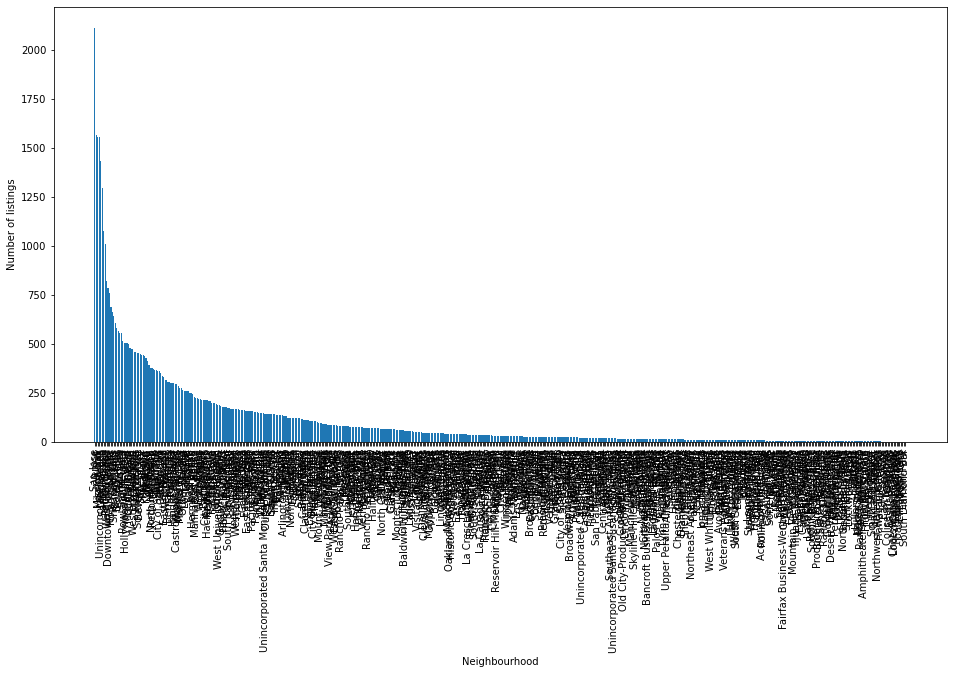

In [161]:
################################# Plot is too crowded, need to create a cutoff to list only the most popular neighbourhood
plt.figure(figsize=(16, 8))
plt.bar(Listing_per_neighbourhood ['Neighbourhood'], Listing_per_neighbourhood ['Number_of_listings'])
plt.ylabel('Number of listings')
plt.xlabel('Neighbourhood')
plt.xticks(ticks=Listing_per_neighbourhood ['Neighbourhood'], rotation=90)
plt.show()

In [162]:
airbnb_CA['neighbourhood_x'].value_counts().head(20)

San Jose                 2115
Venice                   1565
Hollywood                1559
Mission Bay              1556
Unincorporated Areas     1436
Long Beach               1295
Santa Monica             1079
Downtown                 1010
Pacific Beach             822
West Hollywood            784
Downtown/Civic Center     759
La Jolla                  687
Hollywood Hills           664
Glendale                  641
Sherman Oaks              609
East Village              580
Beverly Hills             564
Mission                   557
Palo Alto                 557
Santa Clara               516
Name: neighbourhood_x, dtype: int64

In [163]:
Top20_neighbourhood_x = pd.DataFrame(airbnb_CA['neighbourhood_x'].value_counts().head(20).reset_index().values, columns=["Neighbourhood", "Number_of_listings"])
Top20_neighbourhood_x

,Neighbourhood,Number_of_listings
0,San Jose,2115
1,Venice,1565
2,Hollywood,1559
3,Mission Bay,1556
4,Unincorporated Areas,1436
5,Long Beach,1295
6,Santa Monica,1079
7,Downtown,1010
8,Pacific Beach,822
9,West Hollywood,784


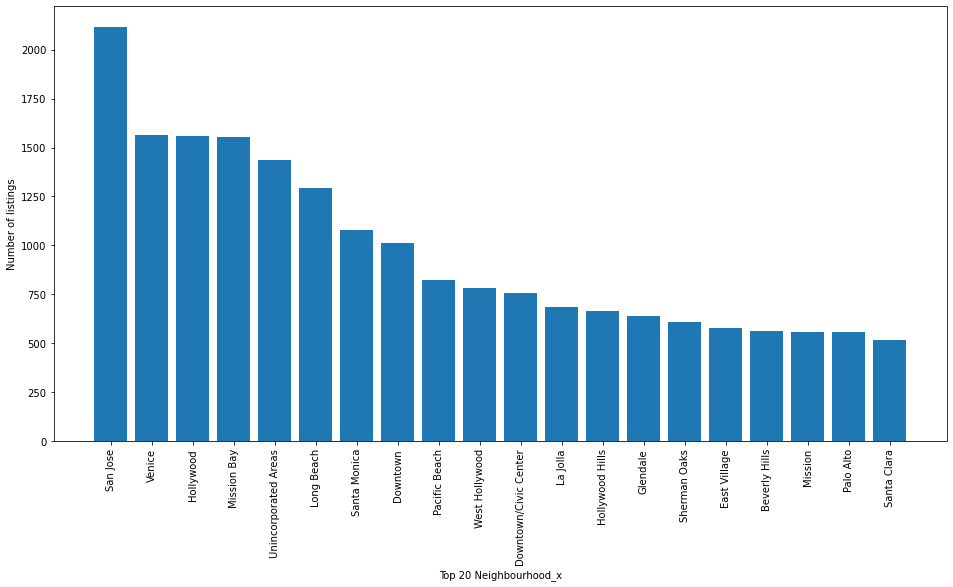

In [164]:
###########################Where is Unincorporated Areas?????? Where is Downtown??????????????????????###################
##################################Can I associate the neighbourhoods with zipcodes?
plt.figure(figsize=(16, 8))
plt.bar(Top20_neighbourhood_x ['Neighbourhood'], Top20_neighbourhood_x ['Number_of_listings'])
plt.ylabel('Number of listings')
plt.xlabel('Top 20 Neighbourhood_x')
plt.xticks(ticks=Top20_neighbourhood_x ['Neighbourhood'], rotation=90)
plt.show()

In [166]:
####################################################################################
#What is the difference among neighbourhood_x, neighbourhood_y,neighbourhood_cleansed, neighbourhood_group and neighbourhood_group_cleansed
airbnb_CA['neighbourhood_y'].value_counts() 

Los Angeles, California, United States                     10323
San Diego, California, United States                        6618
San Francisco, California, United States                    4711
San Jose, California, United States                         1352
Oakland, California, United States                          1326
                                                           ...  
Shadow Hills, California, United States                        1
La Crescenta, California, United States                        1
Mount Baldy, California, United States                         1
Woodland Hills (Los Angeles), California, United States        1
Los Angeles, Hollywood Hills, California, United States        1
Name: neighbourhood_y, Length: 424, dtype: int64

In [167]:
airbnb_CA['neighbourhood_cleansed'].value_counts() 

San Jose                2115
Venice                  1565
Hollywood               1559
Mission Bay             1556
Unincorporated Areas    1436
                        ... 
Joaquin Miller Park        1
Elizabeth Lake             1
Palm City                  1
Lincoln Park               1
South Diamond Bar          1
Name: neighbourhood_cleansed, Length: 555, dtype: int64

In [168]:
airbnb_CA['neighbourhood_group_cleansed'].value_counts() 

City of Los Angeles     17967
Other Cities            12100
Unincorporated Areas     2810
Name: neighbourhood_group_cleansed, dtype: int64

In [169]:
Top20_neighbourhood_y = pd.DataFrame(airbnb_CA['neighbourhood_y'].value_counts().head(20).reset_index().values, columns=["Neighbourhood", "Number_of_listings"])
Top20_neighbourhood_y

,Neighbourhood,Number_of_listings
0,"Los Angeles, California, United States",10323
1,"San Diego, California, United States",6618
2,"San Francisco, California, United States",4711
3,"San Jose, California, United States",1352
4,"Oakland, California, United States",1326
5,"Long Beach, California, United States",923
6,"Santa Monica, California, United States",577
7,"West Hollywood, California, United States",459
8,"Santa Cruz, California, United States",457
9,"Glendale, California, United States",417


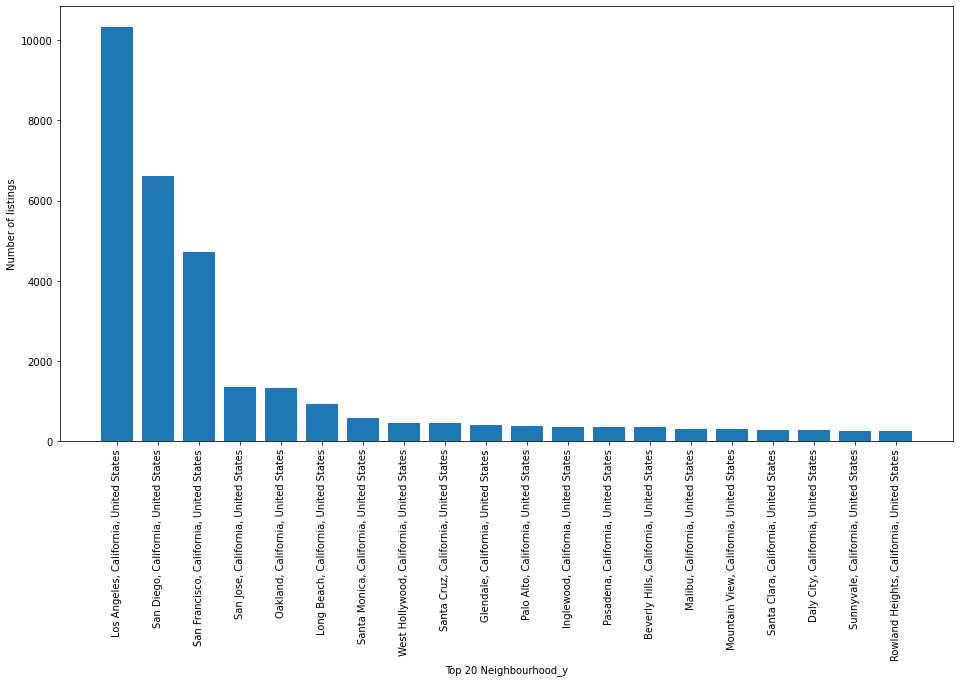

In [170]:
plt.figure(figsize=(16, 8))
plt.bar(Top20_neighbourhood_y ['Neighbourhood'], Top20_neighbourhood_y ['Number_of_listings'])
plt.ylabel('Number of listings')
plt.xlabel('Top 20 Neighbourhood_y')
plt.xticks(ticks=Top20_neighbourhood_y ['Neighbourhood'], rotation=90)
plt.show()